In [206]:
# Lab 1 / Week 3
# Matt Falcona

In [2]:
import pandas as pd #dataframes and analysis
pd.options.mode.chained_assignment = None  # default='warn' #avoid chained error
import numpy as np #math and arrays
import re #regex for cleaning
from scipy.stats import uniform  # for training-and-test split
import matplotlib.pyplot as plt #viz
import seaborn as sns #viz
from sklearn.preprocessing import LabelEncoder #encoding ordinal levels to categorical variables
from sklearn.model_selection import train_test_split #train and test data
from sklearn.linear_model import LinearRegression #glm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error #metrics for models
import statsmodels.api as sm #alternative to sklearn: https://github.com/statsmodels/statsmodels
import statsmodels.formula.api as smf #same as above


In [3]:
coaches = pd.read_csv('https://raw.githubusercontent.com/2SUBDA/IST_718/master/Coaches9.csv')

print(coaches.shape)
print(coaches.info())
print(coaches.iloc[0:10])

(129, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   School        129 non-null    object
 1   Conference    129 non-null    object
 2   Coach         129 non-null    object
 3   SchoolPay     129 non-null    object
 4   TotalPay      129 non-null    object
 5   Bonus         129 non-null    object
 6   BonusPaid     129 non-null    object
 7   AssistantPay  129 non-null    object
 8   Buyout        129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB
None
                  School Conference              Coach    SchoolPay  \
0              Air Force   Mt. West       Troy Calhoun       885000   
1                  Akron        MAC       Terry Bowden    $411,000    
2                Alabama        SEC         Nick Saban  $8,307,000    
3  Alabama at Birmingham      C-USA         Bill Clark    $900,000    
4      Appalachian State 

In [4]:
# adding missing salaries

# Sonny Dykes (SMU) - $1,340,314
# Mike Bloomgreen (Rice) - $1,332,308
# Matt Rhule (Baylor) - $4,113,734
# Kalani Sitake (BYU) - $1,500,000

coaches.loc[coaches['School'] == 'Baylor','SchoolPay'] = '4113734'
coaches.loc[coaches['School'] == 'Brigham Young','SchoolPay'] = '1500000'
coaches.loc[coaches['School'] == 'Southern Methodist','SchoolPay'] = '1340314'
coaches.loc[coaches['School'] == 'Rice','SchoolPay'] = '1332308'

# https://sports.usatoday.com/ncaa/salaries/

In [5]:
#Cleaning the data
numerics = ['SchoolPay', 'TotalPay', 'Bonus', 'BonusPaid', 'AssistantPay', 'Buyout'] #columns that should be float

#using RegEx loop to replace punctuation, symbols, and NAs with 0
for i in numerics:
    coaches[i] = coaches[i].replace('[$,]', '', regex=True)
    coaches[i] = coaches[i].replace('[--]', '0', regex=True)
    coaches[i] = coaches[i].astype(float) #converting to float 

coaches.head() 
coaches.dtypes  # dollar amounts are float64

School           object
Conference       object
Coach            object
SchoolPay       float64
TotalPay        float64
Bonus           float64
BonusPaid       float64
AssistantPay    float64
Buyout          float64
dtype: object

In [6]:
# reading in 2019 record, ratings, and rank

records = pd.read_csv('/Users/matthewfalcona/School/IST718 Big Data/coach_records.csv').fillna(0)
print(records.head())
print(records.shape)
print(records.info())

# https://collegefootballdata.com/exporter/coaches

              School  year  games  wins  losses  rank  sp_overall  \
0          Air Force  2019     13    11       2  22.0        12.1   
1              Akron  2019     12     0      12   0.0       -29.8   
2            Alabama  2019     13    11       2   8.0        32.4   
3  Appalachian State  2019     13    12       1  19.0        11.3   
4            Arizona  2019     12     4       8   0.0        -8.0   

            name  
0   Troy Calhoun  
1       Tom Arth  
2     Nick Saban  
3  Eli Drinkwitz  
4   Kevin Sumlin  
(130, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   School      130 non-null    object 
 1   year        130 non-null    int64  
 2   games       130 non-null    int64  
 3   wins        130 non-null    int64  
 4   losses      130 non-null    int64  
 5   rank        130 non-null    float64
 6   sp_overall  130 non-null 

In [7]:
# reading in 2018 athletic department revenues (USA Today)

revenues = pd.read_excel('/Users/matthewfalcona/School/IST718 Big Data/school_revenues.xlsx').fillna(0)
revenues['Total Revenue'] = revenues['Total Revenue'].astype(float)  # converting revenue values to float
print(revenues.head())
print(revenues.shape)
print(revenues.info())

# https://sports.usatoday.com/ncaa/finances 
# https://www.collegefactual.com/colleges/  -- additional data for private schools

   RK      School     Conf  Total Revenue
0   1       Texas   Big 12    223879781.0
1   2   Texas A&M      SEC    212748002.0
2   3  Ohio State  Big Ten    210548239.0
3   4    Michigan  Big Ten    197820410.0
4   5     Georgia      SEC    174042482.0
(246, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RK             246 non-null    int64  
 1   School         246 non-null    object 
 2   Conf           246 non-null    object 
 3   Total Revenue  246 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.8+ KB
None


In [8]:
# reading in stadium size dataset

stadiums = pd.read_excel('/Users/matthewfalcona/School/IST718 Big Data/stadiums.xlsx')
stadiums['Capacity'] = stadiums['Capacity'].astype(float)  # converting stadium capacity values to float
print(stadiums.head())
print(stadiums.shape)
print(stadiums.info())

# https://www.collegegridirons.com/comparisons-by-capacity/

       School           Stadium Conference  Capacity
0    Michigan  Michigan Stadium    Big Ten  107601.0
1  Penn State    Beaver Stadium    Big Ten  106572.0
2  Ohio State      Ohio Stadium    Big Ten  104944.0
3   Texas A&M        Kyle Field        SEC  102733.0
4   Tennessee   Neyland Stadium        SEC  102521.0
(131, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   School      131 non-null    object 
 1   Stadium     131 non-null    object 
 2   Conference  131 non-null    object 
 3   Capacity    131 non-null    float64
dtypes: float64(1), object(3)
memory usage: 4.2+ KB
None


In [9]:
# reading in graduation rates from NCAA

grad_rate = pd.read_excel('/Users/matthewfalcona/School/IST718 Big Data/grad_rates.xlsx').fillna(0)
# dropping unused columns
# grad_rate = grad_rate.drop(columns = ['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'])
print(grad_rate.head())
print(grad_rate.shape)
print(grad_rate.info())

   Cohort Year       Year                 School                Conference  \
0         2011  2017-2018              Air Force  Mountain West Conference   
1         2011  2017-2018                  Akron   Mid-American Conference   
2         2011  2017-2018                Alabama   Southeastern Conference   
3         2011  2017-2018  Alabama at Birmingham            Conference USA   
4         2011  2017-2018      Appalachian State       Sun Belt Conference   

      Sport State  GSR   FGR  
0  Football    CO   77   0.0  
1  Football    OH   72  61.0  
2  Football    AL   84  63.0  
3  Football    AL   71  58.0  
4  Football    NC   71  67.0  
(131, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cohort Year  131 non-null    int64  
 1   Year         131 non-null    object 
 2   School       131 non-null    object 
 3   Conference   131 

In [10]:
# Merging additional data with coaches dataset

# merge coaches dataset with revenue on School

coaches_plus = pd.merge(coaches, revenues[["School", "Total Revenue"]], on = "School", how = "left")


In [11]:
# merge new coaches dataset with records on School

coaches_plus = pd.merge(coaches_plus, records[["School", "wins", "losses", "sp_overall"]], on = "School", how = "left")

In [12]:
# merge grad rates dataset with coaches on school

coaches_plus = pd.merge(coaches_plus, grad_rate[['School','GSR','FGR']], on = "School", how = "left")

In [13]:
# finally, merge stadiums dataset with coaches dataset on School

coaches_plus = pd.merge(coaches_plus, stadiums[["School", "Capacity"]], on = "School", how = "left")

In [14]:
# mapping conferences to an index value for visualization purposes

conf_num = {"AAC" : 1,
            "ACC" : 2,
            "Big 12" : 3,
            "Big Ten" : 4,
            "C-USA" : 5,
            "Ind." : 6,
            "MAC" : 7,
            "Mt. West" : 8,
            "Pac-12" : 9,
            "SEC" : 10,
            "Sun Belt": 11}

print(conf_num)

coaches_plus['conf_num'] = coaches_plus['Conference'].map(conf_num)

{'AAC': 1, 'ACC': 2, 'Big 12': 3, 'Big Ten': 4, 'C-USA': 5, 'Ind.': 6, 'MAC': 7, 'Mt. West': 8, 'Pac-12': 9, 'SEC': 10, 'Sun Belt': 11}


In [15]:
# checking the combined dataset

coaches_plus.head()  # checks out

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Total Revenue,wins,losses,sp_overall,GSR,FGR,Capacity,conf_num
0,Air Force,Mt. West,Troy Calhoun,885000.0,885000.0,247000.0,0.0,0.0,0.0,60009782.0,11,2,12.1,77,0.0,52237.0,8
1,Akron,MAC,Terry Bowden,411000.0,412500.0,225000.0,50000.0,0.0,688500.0,37194485.0,0,12,-29.8,72,61.0,30000.0,7
2,Alabama,SEC,Nick Saban,8307000.0,8307000.0,1100000.0,500000.0,0.0,33600000.0,164090889.0,11,2,32.4,84,63.0,101821.0,10
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,900000.0,950000.0,165471.0,0.0,3847500.0,36494381.0,9,5,-1.4,71,58.0,71594.0,5
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,712500.0,295000.0,145000.0,0.0,2160417.0,37996512.0,12,1,11.3,71,67.0,24150.0,11


In [16]:
# Data analysis - which potential predictor variables will most strongly predict salary?

# TotalPay to Total Revenue


# TotalPay to Wins


# TotalPay to sp_overall


# TotalPay to Capacity

In [17]:
# First, we must remove any schools which do not have any of the above variables in the dataset

# Army & Navy - no revenue

delete_army = coaches_plus[coaches_plus['School'] == 'Army'].index

coaches_plus = coaches_plus.drop(delete_army)

delete_navy = coaches_plus[coaches_plus['School'] == 'Navy'].index

coaches_plus = coaches_plus.drop(delete_navy)

In [18]:
conf_labels = ["AAC","ACC","Big 12","Big Ten","C-USA","Ind.","MAC","Mt. West","Pac-12","SEC","Sun Belt"]

In [19]:
conf_labels[0:11]

['AAC',
 'ACC',
 'Big 12',
 'Big Ten',
 'C-USA',
 'Ind.',
 'MAC',
 'Mt. West',
 'Pac-12',
 'SEC',
 'Sun Belt']

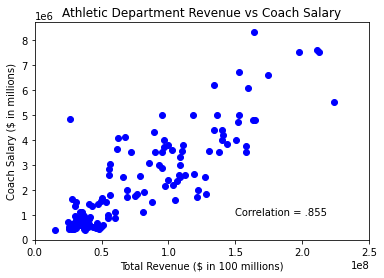

In [318]:
# showing scatter plot of Athletic Department Revenue to Coach Salary

# cmap = plt.cm.get_cmap('jet')
# for i, cluster in coaches_plus.groupby('cluster'):
plt.scatter('Total Revenue', 'SchoolPay', c = "blue", data=coaches_plus)
plt.xlabel('Total Revenue ($ in 100 millions)')
plt.ylabel('Coach Salary ($ in millions)')
plt.xticks([0, 50000000, 100000000, 150000000, 200000000, 250000000])
plt.text(150000000, 1000000, 'Correlation = .855')
plt.title('Athletic Department Revenue vs Coach Salary')
# plt.legend(*scatter.legend_elements(), loc = "lower right", title = "Conference", fontsize = 'xx-small')
# plt.legend(loc = "lower right", title = "Conference", fontsize = 'small')
# plt.legend(conf_labels, [line.get_label() for line in conf_labels], loc = "lower right", title = "Conference", fontsize = 'small')
plt.show()

In [223]:
# calculating correlation between Athletic Department Revenue and Coach Salary

tr_mat = np.corrcoef(coaches_plus['Total Revenue'], coaches_plus['SchoolPay'])
tr_corr = tr_mat[0,1]
tr_corr

0.8548335142604021

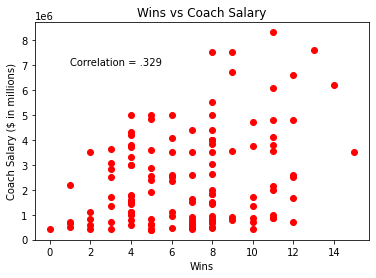

In [320]:
# scatter plot of Wins and Coach Salary

plt.scatter('wins', 'SchoolPay', c = "red", data=coaches_plus)
plt.xlabel('Wins')
plt.ylabel('Coach Salary ($ in millions)')
plt.text(1, 7000000, 'Correlation = .329')
plt.title('Wins vs Coach Salary')
plt.show()

In [225]:
# correlation between Wins and Coach Salary

win_mat = np.corrcoef(coaches_plus['wins'], coaches_plus['SchoolPay'])
win_corr = win_mat[0,1]
win_corr

0.3291059588641858

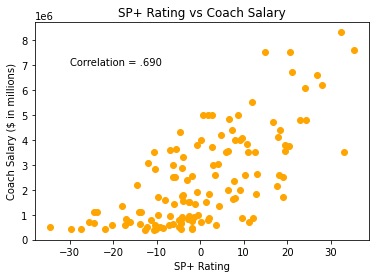

In [321]:
# scatter plot of SP+ rating and Coach Salary

plt.scatter('sp_overall', 'SchoolPay', c = "orange", data=coaches_plus)
plt.xlabel('SP+ Rating')
plt.ylabel('Coach Salary ($ in millions)')
plt.text(-30, 7000000, 'Correlation = .690')
plt.title('SP+ Rating vs Coach Salary')
plt.show()

In [227]:
# correlation between SP+ rating and Coach Salary

sp_mat = np.corrcoef(coaches_plus['sp_overall'], coaches_plus['SchoolPay'])
sp_corr = sp_mat[0,1]
sp_corr

0.690312423727778

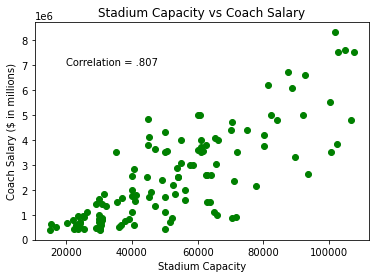

In [329]:
# scatter plot of Stadium Capacity and Coach Salary

plt.scatter('Capacity', 'SchoolPay', c = "green", data=coaches_plus)
plt.xlabel('Stadium Capacity')
plt.ylabel('Coach Salary ($ in millions)')
plt.title('Stadium Capacity vs Coach Salary')
plt.text(20000, 7000000, 'Correlation = .807')
plt.show()

In [229]:
# correlation between Stadium Capacity and Coach Salary

cap_mat = np.corrcoef(coaches_plus['Capacity'], coaches_plus['SchoolPay'])
cap_corr = cap_mat[0,1]
cap_corr

0.8065464892681028

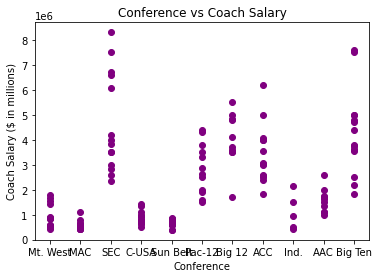

In [324]:
# scatter plot of Conference and Total Coach Pay

plt.scatter('Conference', 'SchoolPay', c = "purple", data=coaches_plus)
plt.xlabel('Conference')
plt.ylabel('Coach Salary ($ in millions)')
plt.title('Conference vs Coach Salary')
plt.show()

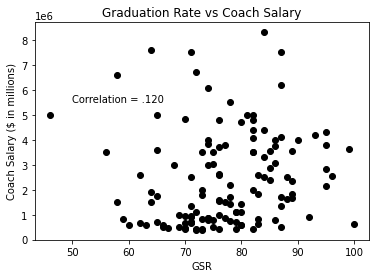

In [328]:
# scatter plot of GSR to Total Coach Pay

plt.scatter('GSR', 'SchoolPay', c = 'black', data = coaches_plus)
plt.xlabel('GSR')
plt.ylabel('Coach Salary ($ in millions)')
plt.title('Graduation Rate vs Coach Salary')
plt.text(50, 5500000, 'Correlation = .120')
plt.show()

In [232]:
gsr_mat = np.corrcoef(coaches_plus['GSR'], coaches_plus['SchoolPay'])
gsr_corr = gsr_mat[0,1]
gsr_corr

0.12008411491634374

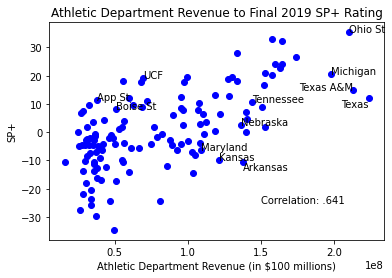

In [35]:
# scatter plot of Stadium Capacity and Coach Salary

plt.scatter('Total Revenue', 'sp_overall', c = "blue", data=coaches_plus)
plt.xlabel('Athletic Department Revenue (in $100 millions)')
plt.ylabel('SP+')
plt.title('Athletic Department Revenue to Final 2019 SP+ Rating')
plt.text(223879781, 9, 'Texas',horizontalalignment='right')
plt.text(143765903, 10.8, 'Tennessee')
plt.text(136233460, 2.6, 'Nebraska')
plt.text(212748002, 15, 'Texas A&M',horizontalalignment='right')
plt.text(197820410, 20.7, 'Michigan')
plt.text(210548239, 35.4, 'Ohio St')
plt.text(50599483, 8.1, 'Boise St')
plt.text(69121887, 19.1, 'UCF')
plt.text(37996512, 11.3, 'App St')
plt.text(137497788, -13.6, 'Arkansas')
plt.text(121553307, -9.8, 'Kansas')
plt.text(108796303, -6.3, 'Maryland')
plt.text(150000000, -25, 'Correlation: .641')
plt.show()

In [21]:
rev_sp_mat = np.corrcoef(coaches_plus['Total Revenue'], coaches_plus['sp_overall'])
rev_sp_corr = rev_sp_mat[0,1]
rev_sp_corr

0.6414682086904554

In [233]:
# Model development

# removing Syracuse from testing and training datasets because we are predicting Syracuse salary

cuse = coaches_plus[coaches_plus['School'] == 'Syracuse']
print(cuse)

no_dino = coaches_plus[coaches_plus['School'] != 'Syracuse']
no_dino['AD_rev'] = no_dino['Total Revenue']
print(no_dino)

       School Conference        Coach  SchoolPay   TotalPay  Bonus  BonusPaid  \
102  Syracuse        ACC  Dino Babers  2401206.0  2401206.0    0.0        0.0   

     AssistantPay  Buyout  Total Revenue  wins  losses  sp_overall  GSR   FGR  \
102           0.0     0.0     99800000.0     5       7        -3.0   85  70.0   

     Capacity  
102   49250.0  
                    School Conference              Coach  SchoolPay  \
0                Air Force   Mt. West       Troy Calhoun   885000.0   
1                    Akron        MAC       Terry Bowden   411000.0   
2                  Alabama        SEC         Nick Saban  8307000.0   
3    Alabama at Birmingham      C-USA         Bill Clark   900000.0   
4        Appalachian State   Sun Belt  Scott Satterfield   712500.0   
..                     ...        ...                ...        ...   
124          West Virginia     Big 12     Dana Holgorsen  3605000.0   
125       Western Kentucky      C-USA   Mike Sanford Jr.   800000.0   
126

In [235]:
# creating train and test datasets

np.random.seed(1234)

no_dino['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(no_dino))
coach_train = no_dino[no_dino['runiform'] >= .33]
coach_test = no_dino[no_dino['runiform'] < .33 ]

print(coach_train.head())
print(coach_test.head())

                  School Conference              Coach  SchoolPay   TotalPay  \
1                  Akron        MAC       Terry Bowden   411000.0   412500.0   
2                Alabama        SEC         Nick Saban  8307000.0  8307000.0   
3  Alabama at Birmingham      C-USA         Bill Clark   900000.0   900000.0   
4      Appalachian State   Sun Belt  Scott Satterfield   712500.0   712500.0   
7               Arkansas        SEC        Chad Morris  3500000.0  3500000.0   

       Bonus  BonusPaid  AssistantPay      Buyout  Total Revenue  wins  \
1   225000.0    50000.0           0.0    688500.0     37194485.0     0   
2  1100000.0   500000.0           0.0  33600000.0    164090889.0    11   
3   950000.0   165471.0           0.0   3847500.0     36494381.0     9   
4   295000.0   145000.0           0.0   2160417.0     37996512.0    12   
7  1000000.0        0.0           0.0  12500000.0    137497788.0     2   

   losses  sp_overall  GSR   FGR  Capacity       AD_rev  runiform  
1     

In [236]:
# creating model using variables with high correlation (>.5)

# Revenue, SP+, Stadium

coach_model = str('SchoolPay ~ AD_rev + sp_overall + Capacity')

In [237]:
# fit model to training set

train_model_fit = smf.ols(coach_model, data = coach_train).fit()
print(train_model_fit.summary())

# training set predictions from model fit to training set
coach_train['predict_salary'] = train_model_fit.fittedvalues

# test set predictions from model fit to training set
coach_test['predict_salary'] = train_model_fit.predict(coach_test)

                            OLS Regression Results                            
Dep. Variable:              SchoolPay   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     116.3
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           3.59e-30
Time:                        19:40:07   Log-Likelihood:                -1360.3
No. Observations:                  90   AIC:                             2729.
Df Residuals:                      86   BIC:                             2739.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.077e+04   2.71e+05     -0.040      0.9

In [239]:
# model test results:

# print('\nProportion of Test Set Variance Accounted for: ',\
 #   round(np.power(coach_test['SchoolPay'].corr(coach_test['predict_salary']),2),3))

final_model_fit = smf.ols(coach_model, data = no_dino).fit()
print(final_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              SchoolPay   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     142.2
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           1.19e-39
Time:                        19:40:18   Log-Likelihood:                -1904.0
No. Observations:                 126   AIC:                             3816.
Df Residuals:                     122   BIC:                             3827.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.445e+05   2.37e+05     -0.610      0.5

In [336]:
print(cuse)

       School Conference        Coach  SchoolPay   TotalPay  Bonus  BonusPaid  \
102  Syracuse        ACC  Dino Babers  2401206.0  2401206.0    0.0        0.0   

     AssistantPay  Buyout  Total Revenue  wins  losses  sp_overall  GSR   FGR  \
102           0.0     0.0     99800000.0     5       7        -3.0   85  70.0   

     Capacity  
102   49250.0  


In [205]:
# calculating Syracuse coach salary

-1.445e+05 + (.0205*99800000) + (2.888e+04*-3) + (17.4412*49250)

2673739.1

In [332]:
# creating model using variables with high correlation (>.5)

# Revenue, SP+, Stadium, Conference

conf_model = str('SchoolPay ~ Conference + AD_rev + sp_overall + Capacity')

In [333]:
# fit model to training set

train_model_fit = smf.ols(conf_model, data = coach_train).fit()
print(train_model_fit.summary())

# training set predictions from model fit to training set
coach_train['predict_salary'] = train_model_fit.fittedvalues

# test set predictions from model fit to training set
coach_test['predict_salary'] = train_model_fit.predict(coach_test)

                            OLS Regression Results                            
Dep. Variable:              SchoolPay   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     32.59
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           9.18e-26
Time:                        22:29:28   Log-Likelihood:                -1348.5
No. Observations:                  90   AIC:                             2725.
Df Residuals:                      76   BIC:                             2760.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2.51

In [340]:
# calculating Syracuse salary for best model

2.517e+05 + 1.171e+06 + (.0113*99800000) + (3.017e+04*-3) + (12.3927*49250)

# 3,070,270.48

3070270.475

In [339]:
# calculating Syracuse salary in Big East or Big Ten

# using AAC conference as stand in for Big East due to historial similarities

# Big East (AAC)

2.517e+05 + (.0113*99800000) + (3.017e+04*-3) + (12.3927*49250)

# $1,899,270.48

1899270.475

In [338]:
# Big Ten

2.517e+05 + 1.562e+06 + (.0113*99800000) + (3.017e+04*-3) + (12.3927*49250)

# $3,461,270.48

3461270.475

In [334]:
# creating model using variables with high correlation (>.5), dropping stadium size (high p value)

# Revenue, SP+, Conference

no_stad_model = str('SchoolPay ~ Conference + AD_rev + sp_overall')

In [335]:
# fit model to training set

train_model_fit = smf.ols(no_stad_model, data = coach_train).fit()
print(train_model_fit.summary())

# training set predictions from model fit to training set
coach_train['predict_salary'] = train_model_fit.fittedvalues

# test set predictions from model fit to training set
coach_test['predict_salary'] = train_model_fit.predict(coach_test)

                            OLS Regression Results                            
Dep. Variable:              SchoolPay   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     34.26
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           5.88e-26
Time:                        22:32:35   Log-Likelihood:                -1350.2
No. Observations:                  90   AIC:                             2726.
Df Residuals:                      77   BIC:                             2759.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               5.80